In [2]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import scipy.signal as sg

from synt import *
from const import *
from function import *
from envolv import *
from effects import *
import osc

ModuleNotFoundError: No module named 'synt.const'; 'synt' is not a package

In [2]:
#player
input = None

def callback(outdata, frames, time, status):
    global input
    # print('entro')
    if input is not None:
        bloque = input.next()
        # convertimos formato (CHUNK,) a (CHUNK,1) para que adecuarlo a sounddevice
        outdata[:] = bloque.reshape(-1, 1)
    else:
        # si no hay datos, reproducimos silencio
        outdata[:] = np.zeros((CHUNK, 1))


# stream de salida con callBack
stream = sd.OutputStream(samplerate=SRATE, channels=2,
                         callback=callback, blocksize=CHUNK)
stream.start()

In [3]:
from copy import copy
def showOsc(osc, time, chunks=False,samplerate=SRATE, chunk=CHUNK):
    _osc = copy(osc)
    signal = np.zeros(0)
    _chunks = time
    if chunks:
        _chunks = int(time*samplerate/chunk)
    for i in range(_chunks):
        signal = np.concatenate((signal, _osc.next()))
    plt.plot(signal)

In [ ]:
import fallo!

SyntaxError: invalid syntax (3103231707.py, line 1)

In [ ]:
stream.stop()

In [ ]:
stream.start()

ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


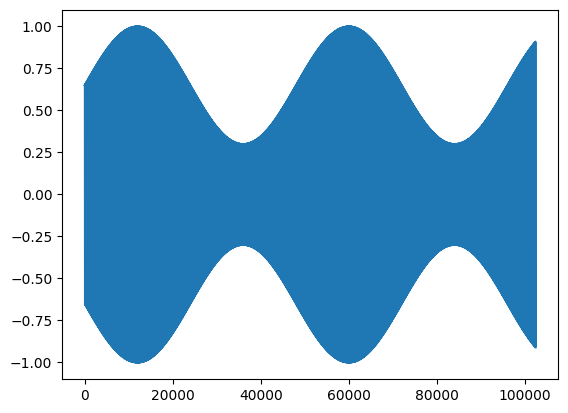

In [ ]:
synt = Synt(Const(440), osc.Square(), amp=Sine(1, 1, .3), phase=Sine(2000, .5, -.5))
showOsc(synt, 100)
input = synt

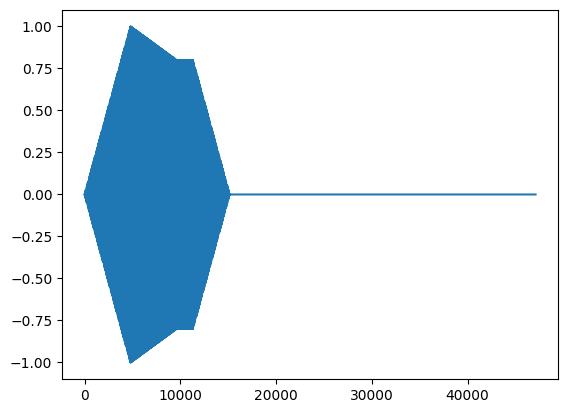

In [ ]:
env = EnvADSR(atk=.1, sus=.8, dec=.1, rel=.08, dur=60/4/130)
synt = Synt(Const(200), osc.Square(), amp=Const(1),phase=Sine(2000, .9, -.9), env=env)

showOsc(synt,1, True)

input = synt

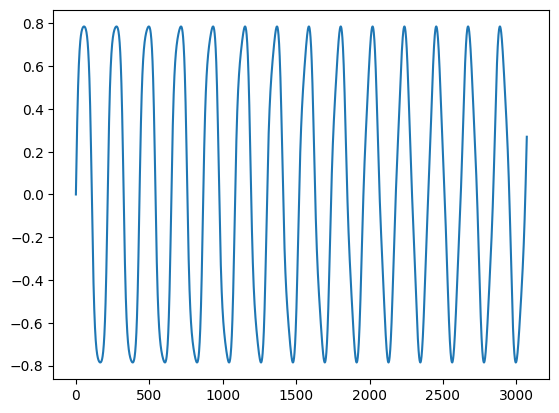

In [ ]:
'''como podemos ver, fase es el modulador de la frecuencia base'''
synt = Synt(Const(440), osc.Triangle(), amp=Const(1), phase=Sine(450, .2, -.2), chunk=CHUNK)
showOsc(synt,3)
input = synt
# plt.plot(Sine(4, min=450, max=440).next(np.arange(0, SRATE, 1))%1)
# plt.plot(Sine(4, min=440, max=440).next(np.arange(SRATE*4, SRATE*5, 1)))

'sale de esta manera porque la funcion es sin(t*sin(t))'

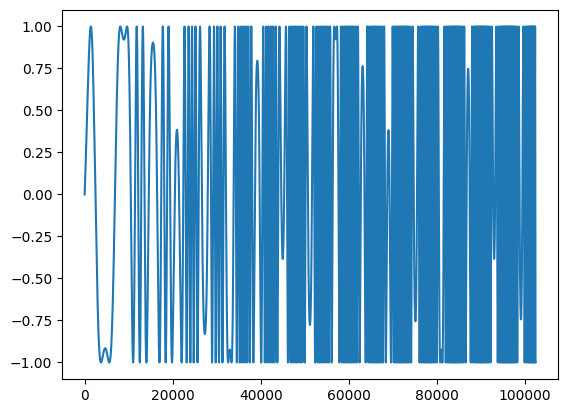

In [ ]:

synt = Synt(Sine(4, 10, 1), osc.Sine(), amp=Const(1), phase=Const(0), chunk=CHUNK)
showOsc(synt,100)

# sin = (Sine(4, 420, 440).next(np.arange(0,CHUNK*500))-430)/8
# plt.plot(sin)
# sd.wait()
'''sale de esta manera porque la funcion es sin(t*sin(t))'''

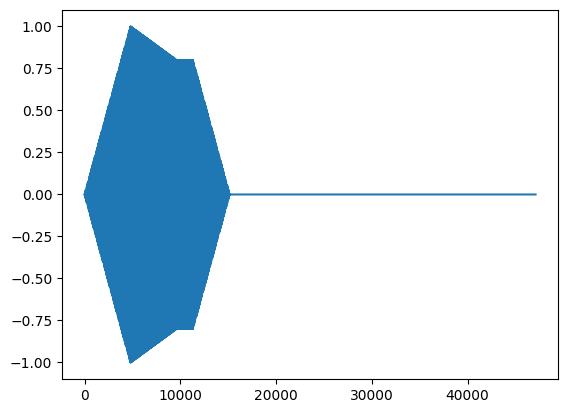

In [ ]:
env = EnvADSR(atk=.1, sus=.8, dec=.1, rel=.08, dur=60/4/130)
synt = Synt(Const(200), osc.Square(), amp=Const(1),phase=Sine(2000, .9, -.9), env=env)
showOsc(synt,1,True)
input = synt

ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


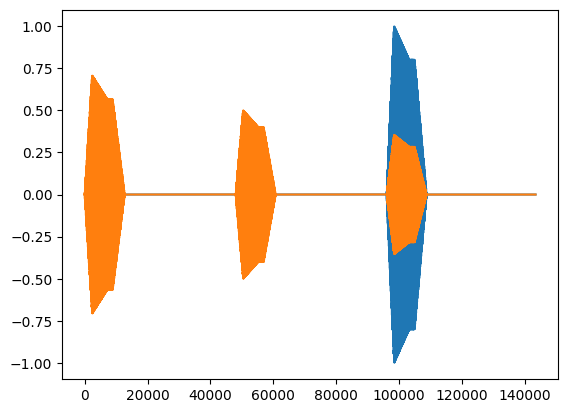

In [5]:
env = EnvADSR(atk=.05, sus=.8, dec=.1, rel=.08, dur=60/4/130)
synt = Synt(Const(440), osc.Sine(), amp=Const(1), phase=Sine(2000, .9, -.9), env=env)
e1 = Echo(copy(synt), val=.5, time=1, restar=True)
# e1 = synt
e2 = Delay(copy(synt), 2)
showOsc(e2,3,True)
showOsc(e1,3,True)
input = e1

# print(len(input.next()))